<p align="center">
<img src="https://github.com/datacamp/python-live-training-template/blob/master/assets/datacamp.svg?raw=True" alt = "DataCamp icon" width="50%">
</p>
<br><br>

# **Machine Learning with XGboost**

Welcome to this hands-on training where we will learn how to use XGBoost to create powerful prediction models using gradient boosting. Using Jupyter Notebooks you'll learn how to efficiently create, evaluate, and tune XGBoost models. This session will run for three hours, allowing you time to really immerse yourself in the subject, and includes short breaks and opportunities to ask the expert questions throughout the training. 

You will learn how to:

- How to instantiate and customize XGBoost models
- How to use XGBoost's DMatrix to optimize performance
- How to evaluate models in XGBoost using the right metrics
- How to tune parameters in XGBoost to achieve the best results
- How to visualize trees in XGBoost to analyze feature importance


## **The Dataset**

The dataset to be used in this webinar is a CSV file named `hotel_bookings_clean.csv`, which contains data on hotel bookings. 

### Acknowledgements
The dataset was downloaded on [Kaggle](https://www.kaggle.com/jessemostipak/hotel-booking-demand/). The data is originally from an article called [Hotel booking demand datasets](https://www.sciencedirect.com/science/article/pii/S2352340918315191) by Nuno Antonio, Ana de Almeida, and Luis Nunes. It was then cleaned by Thomas Mock and Antoine Bichat for [#TidyTuesday during the week of February 11th, 2020](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-11/readme.md). For the purposes of this live training, it was further pre-processed to have cleaner ready-to-use features (e.g., dropping of irrelevant columns, one-hot-encoding). The dataset has the following [license](https://creativecommons.org/licenses/by/4.0/).

### Data Dictionary

It contains the **53 columns**:

_For binary variables: `1` = true and `0` = false._

- `is_cancelled`: binary variable indicating whether a booking was canceled
- `lead time`: Number of days bettween booking data and arrival date
- `arrival_date_week_number`, `arrival_date_day_of_month`, `arrival_date_month`: Week number, day date, and month number of arrival date. 
- `stays_in_weekend_nights`, `stays_in_week_nights`: Number of weekend nights (Saturday and Sunday) and week nights (Monday to Friday) the guest booked
- `adults`,`children`,`babies`: Number of adults, children, babies booked for the stay
- `is_repeated_guest`: binary variable indicating whether the customer was a repeat guest 
- `previous_cancellations`: Number of prior bookings that were cancelled by the customer
- `previous_bookings_not_canceled`: Number of prior bookings that were not cancelled by the customer
- `required_car_parking_spaces`: Number of parking spaces needed by the customer
- `total_of_special_requests`: Number of special requests made by the customer
- `avg_daily_rate`: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
- `booked_by_company`: binary variable indicating whether the booking was booked by a company               
- `booked_by_agent`: binary variable indicating whether the booking was booked by an agent 
- `hotel_city Hotel`: binary variable indicating whether the booked hotel is a "City Hotel"
- `hotel_Resort Hotel`: binary variable indicating whether the booked hotel is a "Resort Hotel"
- `meal_BB`: binary variable indicating whether a bed & breakfast meal was booked 
- `meal_HB`: binary variable indicating whether a half board meal was booked
- `meal_FB`: binary variable indicating whether a full board meal was booked 
- `meal_No meal`:binary variable indicating whether there was no meal package booked 
- `market_segment_Aviation`, `market_segment_Complementary`, `market_segment_Corporate`, `market_segment_Direct`, `market_segment_Groups`, `market_segment_Offline TA/TO`, `market_segment_Online TA`, `market_segment_Undefined`: Indicates market segment designation with a value of `1`. "TA"= travel agent, "TO"= tour operators.
- `distribution_channel_Corporate`, `distribution_channel_Direct`, `distribution_channel_GDS`, `distribution_channel_TA/TO`, `distribution_channel_Undefined`: indicates booking distribution channel with a value of `1`. "TA"= travel agent, "TO"= tour operators, "GDS" = Global Distribution System.
- `reserved_room_type_A`,`reserved_room_type_B`, `reserved_room_type_C`,`reserved_room_type_D`, `reserved_room_type_E`, `reserved_room_type_F`, `reserved_room_type_G`, `reserved_room_type_H`, `reserved_room_type_L`: indicates code of room type reserved with a value of `1`. Code is presented instead of designation for anonymity reasons
- `deposit_type_No Deposit`: binary variable indicating whether a deposit was made
- `deposit_type_Non Refund`: binary variable indicating whether a deposit was made in the value of the total stay cost
- `deposit_type_Refundable`: binary variable indicating whether a deposit was made with a value under the total stay cost 
- `customer_type_Contract`: binary variable indicating whether the booking has an allotment or other type of contract associated to it 
- `customer_type_Group`: binary variable indicating whether the booking is associated to a group 
- `customer_type_Transient`: binary variable indicating whether the booking is not part of a group or contract, and is not associated to other transient booking
- `customer_type_Transient-Party`: binary variable indicating whether the booking is transient, but is associated to at least other transient booking

## **1. Getting to know our data**

Let's get to know our columns and split our data into features and labels!

In [164]:
# Import libraries
import pandas as pd
import xgboost as xgb # XGBoost typically uses the alias "xgb"
import numpy as np

In [165]:
# Read in the dataset
bookings = pd.read_csv('https://raw.githubusercontent.com/datacamp/Machine-Learning-With-XGboost-live-training/master/data/hotel_bookings_clean.csv')

# List out our columns
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119210 entries, 0 to 119209
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119210 non-null  int64  
 1   lead_time                       119210 non-null  int64  
 2   arrival_date_week_number        119210 non-null  int64  
 3   arrival_date_day_of_month       119210 non-null  int64  
 4   arrival_date_month              119210 non-null  int64  
 5   stays_in_weekend_nights         119210 non-null  int64  
 6   stays_in_week_nights            119210 non-null  int64  
 7   adults                          119210 non-null  int64  
 8   children                        119206 non-null  float64
 9   babies                          119210 non-null  int64  
 10  is_repeated_guest               119210 non-null  int64  
 11  previous_cancellations          119210 non-null  int64  
 12  previous_booking

Looks like we have 52 columns with 119,210 rows. All the datatypes are numeric and ready for use.

In [15]:
# Take a closer look at column distributions
bookings.describe()

is_canceled      lead_time  arrival_date_week_number  \
count  119210.000000  119210.000000             119210.000000   
mean        0.370766     104.109227                 27.163376   
std         0.483012     106.875450                 13.601107   
min         0.000000       0.000000                  1.000000   
25%         0.000000      18.000000                 16.000000   
50%         0.000000      69.000000                 28.000000   
75%         1.000000     161.000000                 38.000000   
max         1.000000     737.000000                 53.000000   

       arrival_date_day_of_month  arrival_date_month  stays_in_weekend_nights  \
count              119210.000000       119210.000000            119210.000000   
mean                   15.798717            6.552051                 0.927053   
std                     8.781070            3.089796                 0.995117   
min                     1.000000            1.000000                 0.000000   
25%                     8.000000            4.000000                 0.000000   
50%                    16.000000            7.000000                 1.000000   
75%                    23.000000            9.000000                 2.000000   
max                    31.000000           12.000000                19.000000   

       stays_in_week_nights         adults       children         babies  ...  \
count         119210.000000  119210.000000  119206.000000  119210.000000  ...   
mean               2.499195       1.859206       0.104047       0.007961  ...   
std                1.897106       0.575186       0.398842       0.097509  ...   
min                0.000000       0.000000       0.000000       0.000000  ...   
25%                1.000000       2.000000       0.000000       0.000000  ...   
50%                2.000000       2.000000       0.000000       0.000000  ...   
75%                3.000000       2.000000       0.000000       0.000000  ...   
max               50.000000      55.000000      10.000000      10.000000  ...   

       reserved_room_type_G  reserved_room_type_H  reserved_room_type_L  \
count         119210.000000         119210.000000         119210.000000   
mean               0.017549              0.005042              0.000050   
std                0.131305              0.070825              0.007094   
min                0.000000              0.000000              0.000000   
25%                0.000000              0.000000              0.000000   
50%                0.000000              0.000000              0.000000   
75%                0.000000              0.000000              0.000000   
max                1.000000              1.000000              1.000000   

       deposit_type_No Deposit  deposit_type_Non Refund  \
count            119210.000000            119210.000000   
mean                  0.876277                 0.122364   
std                   0.329266                 0.327707   
min                   0.000000                 0.000000   
25%                   1.000000                 0.000000   
50%                   1.000000                 0.000000   
75%                   1.000000                 0.000000   
max                   1.000000                 1.000000   

       deposit_type_Refundable  customer_type_Contract  customer_type_Group  \
count            119210.000000           119210.000000        119210.000000   
mean                  0.001359                0.034158             0.004815   
std                   0.036839                0.181636             0.069223   
min                   0.000000                0.000000             0.000000   
25%                   0.000000                0.000000             0.000000   
50%                   0.000000                0.000000             0.000000   
75%                   0.000000                0.000000             0.000000   
max                   1.000000                1.000000             1.000000   

       customer_type_Transient  customer_ty

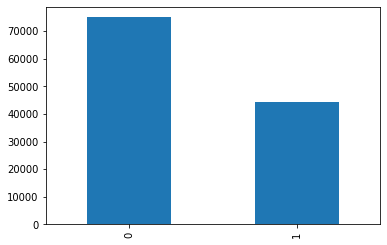

In [175]:
# Plot cancellation counts to visualize proportion of not cancelled and cancelled
bookings['is_canceled'].value_counts().plot(kind='bar')

Remember for our binary variables, like `is_canceled`, `1` = true and `0` = false.

In [176]:
# Let's get an exact percentage of not cancelled and cancelled
(bookings['is_canceled'].value_counts()/bookings['is_canceled'].count())*100

0    62.923412
1    37.076588
Name: is_canceled, dtype: float64

### Which features are most correlated to cancelations?

#### Correlation Coefficient
- Quantifies the linear relationship between two variables
- Number between -1 and 1
- Magnitude corresponds to strength of relationship
- Sign (+ or -) corresponds to direction of relationship
- Most common way to calculate: **Pearson product-moment correlation coefficient**

![Plots displaying different levels of correlation](https://github.com/datacamp/Machine-Learning-With-XGboost-live-training/blob/master/assets/correlation.png?raw=true)

We can use `pandas`'s [function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) `DataFrame.corr()` which returns a correlation matrix using the Pearson correlation coefficient as default. 

In [177]:
# Which features are most correlated with `is_cancelled`?
correlation = bookings.corr()['is_canceled'].sort_values(ascending=False)
correlation

is_canceled                       1.000000
deposit_type_Non Refund           0.481507
lead_time                         0.292876
market_segment_Groups             0.221990
distribution_channel_TA/TO        0.176005
hotel_City Hotel                  0.137082
customer_type_Transient           0.133235
previous_cancellations            0.110139
booked_by_agent                   0.102218
reserved_room_type_A              0.069117
adults                            0.058182
avg_daily_rate                    0.046492
meal_FB                           0.038790
stays_in_week_nights              0.025542
meal_BB                           0.012786
arrival_date_month                0.011179
arrival_date_week_number          0.008315
distribution_channel_Undefined    0.005755
reserved_room_type_H              0.005436
market_segment_Undefined          0.005336
children                          0.004862
reserved_room_type_L             -0.000550
stays_in_weekend_nights          -0.001323
reserved_ro

Be cautious, correlation does not equal feature importance! Correlation may not neccesarily help differentiate classes. Also, the Pearson coefficient only considers **linear** relationships and some of these variables are binary.

### Splitting data
Let's split our label and features so we can get to building models! The first column is our label `is_cancelled`, the rest are features.

In [178]:
# Define X and y
X, y = bookings.iloc[:,1:], bookings.iloc[:,0]

## 2. Your First XGBoost Classifier 

XGBoost has a  [scikit-learn API](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn), which is useful if you want to use different scikit-learn classes and methods on an XGBoost model (e.g.,`predict()`, `fit()`). 

In this section, we'll try the API out with the `xgboost.XGBClassifier()` class and get a baseline accuracy for the rest of our work.

In [258]:
from sklearn.model_selection import train_test_split

# Train and test split using sklearn
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.33, random_state=123)

# Instatiate a XGBClassifier with gbtree as the booster
xgb_clf = xgb.XGBClassifier(booster="gbtree")

# Inspect the parameters
xgb_clf.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': 'gbtree',
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

Note the default objective for classification.

In [225]:
## Set some parameters so it doesn't run too long
### max depth = 6: Maximum tree depth for base learners.
### n_estimators = 10: Number of gradient boosted trees. (aka num_boost_rounds)
xgb_clf.set_params(max_depth=6, n_estimators=10)

# Fit it to the training set
xgb_clf.fit(X_train, y_train)

# Predict the labels of the test set
preds = xgb_clf.predict(X_test)

# Calculate the accuracy
## Accuracy = correctly predicted data points / all the data points 
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]

# Print the baseline accuracy
print("baseline accuracy:", accuracy)

baseline accuracy: 0.8145907473309608


### Visualizing your tree

`XGBoost` has two handy visualization functions for interpreting results:
- `plot_importance()`
- `plot_tree()`

#### plot_importance()

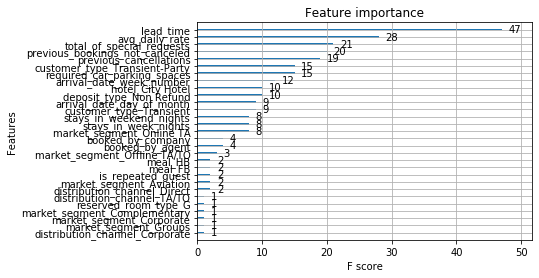

In [218]:
# Plot importance
xgb.plot_importance(xgb_clf)

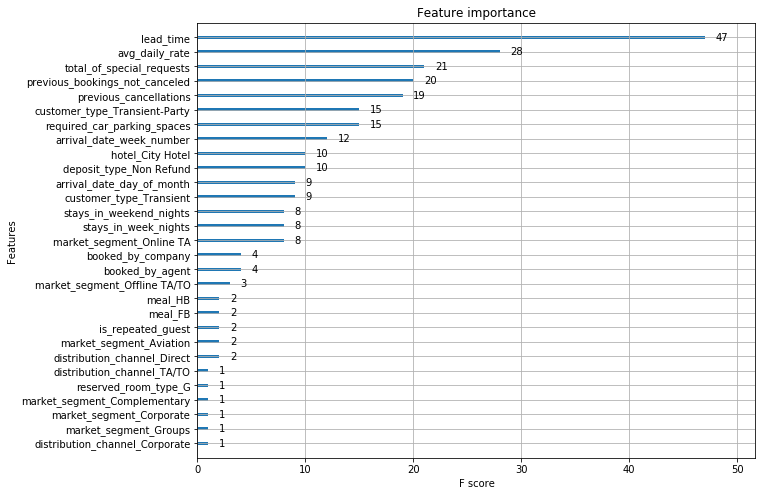

In [219]:
import matplotlib.pyplot as plt

# Try plotting importance again with a nicer width/height of 10/8
fig, ax = plt.subplots(figsize=(10,8))
xgb.plot_importance(xgb_clf, ax=ax)

How is importance calculated? Here's an excerpt from the [documentation](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.plotting):

> **importance_type (str, default "weight") –**
> How the importance is calculated: either “weight”, “gain”, or “cover”
> - ”weight” is the number of times a feature appears in a tree
> - ”gain” is the average gain of splits which use the feature
> - ”cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split

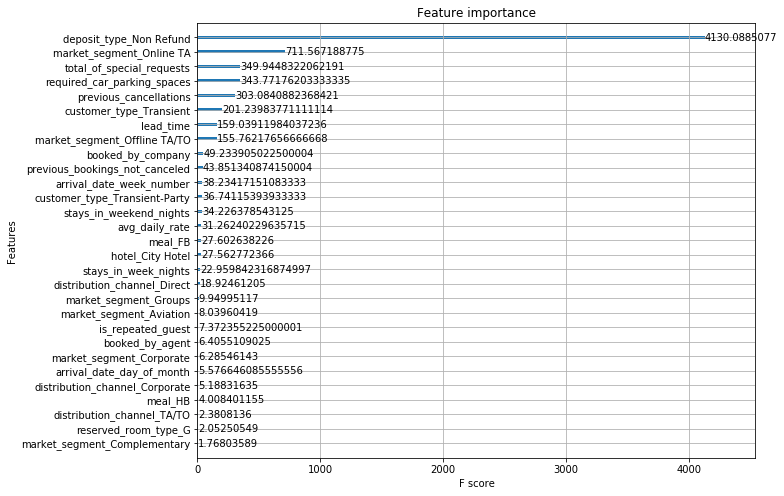

In [220]:
# Adel, my plots won't plot unless I redefine the axes. Is there any way to avoid this?
fig, ax = plt.subplots(figsize=(10,8))

# Plot gain instead of weight
xgb.plot_importance(xgb_clf, ax=ax, importance_type="gain")

#### plot_tree()

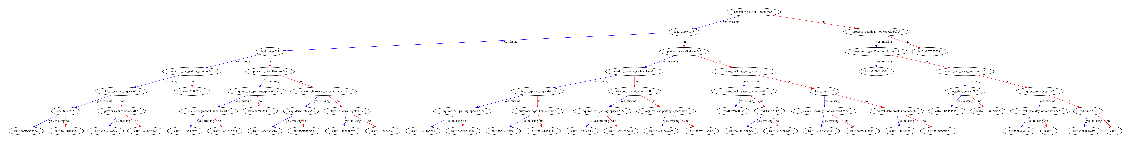

In [221]:
fig, ax = plt.subplots(figsize=(20,10))

# Plot the first tree
xgb.plot_tree(xgb_clf, num_trees=0, ax=ax)

Check out a higher resolution version of the tree [here](https://github.com/datacamp/Machine-Learning-With-XGboost-live-training/blob/master/assets/tree1.png?raw=true).

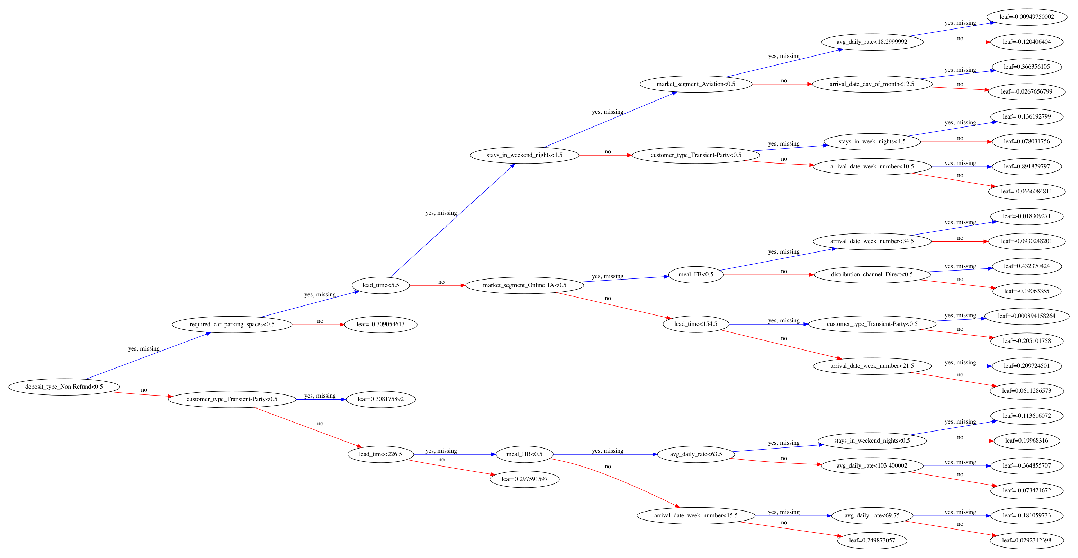

In [222]:
fig, ax = plt.subplots(figsize=(20,10))

# Plot the last tree
## Make the direction left to right instead of top to bottom
xgb.plot_tree(xgb_clf, num_trees=9, ax=ax, rankdir='LR')

Check out a higher resolution version of the tree [here](https://github.com/datacamp/Machine-Learning-With-XGboost-live-training/blob/master/assets/tree2.png?raw=true).

# 3. Cross Validation in XGBoost

Cross validation is considered best practice for assessing a model's performance. We can use `xgboost.cv()` to efficiently run cross validation on XGBoost models. This method is part of XGBoost's core library and **not** part of XGBoost's scikit-learn API from earlier. 

![K-Fold Cross Validation](https://upload.wikimedia.org/wikipedia/commons/b/b5/K-fold_cross_validation_EN.svg)

_Image attribution: Gufosowa / CC BY-SA (https://creativecommons.org/licenses/by-sa/4.0), [Source Link](https://commons.wikimedia.org/wiki/File:K-fold_cross_validation_EN.svg)_

### Converting to DMartix

In order to use `xgboost.cv()`, we need to convert our dataframe into a `DMatrix`. This will optimize for both memory efficiency and training speed. One of the biggest advantages of using the non-scikit-learn compatible functions is that you can use `DMatrix`. Conversion is simple!

In [150]:
# Convert X and y into a DMatrix
bookings_dmatrix = xgb.DMatrix(data=X,label=y)

### Cross validation with xgb.cv

Note: Scikit-learn uses `n_estimator` to refer to the number of boosting rounds or number of gradient boosted trees. In XGBoost, it's refer to as `num_boost_rounds`.

In [212]:
# Define booster parameters using a dictionary
## Default: objective="binary:logistic" and the max_depth=6
params = {"objective":"binary:logistic", 'max_depth': 6}

# Instantiate a CV object
## Default: 3 folds and 10 boosting rounds
xgb_cv = xgb.cv(dtrain=bookings_dmatrix, params=params, nfold=3, num_boost_round=10, seed=123)

# Inspect the results: how are they stored?
xgb_cv

train-error-mean  train-error-std  test-error-mean  test-error-std
0          0.189938         0.002429         0.190647        0.001780
1          0.186880         0.000754         0.187300        0.001500
2          0.186818         0.001062         0.187274        0.001170
3          0.186691         0.001051         0.187216        0.001130
4          0.186431         0.000943         0.186989        0.001449
5          0.186318         0.000935         0.186738        0.001496
6          0.186058         0.000679         0.186293        0.002138
7          0.185228         0.001301         0.185689        0.001878
8          0.184884         0.001083         0.185588        0.001600
9          0.184465         0.001127         0.184926        0.002164

#### Results in XGBoost

`error` as defined by [XGBoost documentation](https://xgboost.readthedocs.io/en/latest/parameter.html#learning-task-parameters):
> Binary classification error rate. It is calculated as `#(wrong cases)/#(all cases)`. For the predictions, the evaluation will regard the instances with prediction value larger than 0.5 as positive instances, and the others as negative instances.

So we need to subtract the last boosting round's `test-error-mean` from 1 to get the accuracy...

In [213]:
# Get the result from last boosting round
results = xgb_cv.tail(1)

# Caclulate accuracy
accuracy= 1 - xgb_cv["test-error-mean"].iloc[-1]

# Print the baseline accuracy
print("baseline accuracy:", accuracy)

baseline accuracy: 0.8150743333333333


This is very close to our `xgboost.XGBClassifier()` baseline of `0.8145` which used the same booster parameters. This helps validate its performance. Let's now look into improving performace.

### More trees with early stopping

We've been using 10 trees (aka `num_boost_rounds`). Let's add more trees (40 instead of 10), but make sure to add **early stopping**. 

Early stopping works by testing the model after every boosting round against the holdout set and if the holdout metric (error in our case) has not improved after a given number of rounds (defined by `early_stopping_rounds`), then any additional boosting rounds are stopped. If the model continuously improves up to `num_boost_round`, then early stopping does not occur.

This helps automatically select the nuumber of boosting rounds and minimize unnecessary training time.

In [226]:
# Increase the number of trees to 40 and set the early stopping rounds to 5
xgb_cv = xgb.cv(dtrain=bookings_dmatrix, params=params, nfold=3,
                    num_boost_round=40,early_stopping_rounds=5, seed=123)

# Caclulate accuracy
accuracy= 1 - xgb_cv["test-error-mean"].iloc[-1]

# Print the accuracy
print("accuracy:", accuracy)

accuracy: 0.8282523333333334


In [227]:
# Did early stopping happen?
xgb_cv

train-error-mean  train-error-std  test-error-mean  test-error-std
0           0.189938         0.002429         0.190647        0.001780
1           0.186880         0.000754         0.187300        0.001500
2           0.186818         0.001062         0.187274        0.001170
3           0.186691         0.001051         0.187216        0.001130
4           0.186431         0.000943         0.186989        0.001449
5           0.186318         0.000935         0.186738        0.001496
6           0.186058         0.000679         0.186293        0.002138
7           0.185228         0.001301         0.185689        0.001878
8           0.184884         0.001083         0.185588        0.001600
9           0.184465         0.001127         0.184926        0.002164
10          0.183554         0.000822         0.184179        0.001815
11          0.183240         0.000369         0.184078        0.002024
12          0.182233         0.000639         0.183189        0.001910
13          0.181612         0.000592         0.182736        0.001922
14          0.181382         0.000361         0.182393        0.002207
15          0.180551         0.000363         0.181839        0.002095
16          0.180178         0.000347         0.181436        0.002444
17          0.179209         0.000318         0.180798        0.002658
18          0.179075         0.000067         0.180673        0.002511
19          0.178437         0.000436         0.180220        0.002906
20          0.177686         0.000366         0.179859        0.002724
21          0.176722         0.000338         0.179062        0.002441
22          0.176080         0.000170         0.178441        0.002256
23          0.175698         0.000231         0.178148        0.002547
24          0.175250         0.000339         0.177972        0.002617
25          0.174285         0.000419         0.177108        0.002351
26          0.172771         0.000386         0.175908        0.002161
27          0.171974         0.000530         0.175346        0.002560
28          0.171617         0.000634         0.175254        0.002514
29          0.171034         0.000844         0.174574        0.001995
30          0.170284         0.001514         0.174272        0.001976
31          0.169784         0.001278         0.173987        0.001850
32          0.169390         0.001150         0.173987        0.001870
33          0.169243         0.001229         0.173937        0.001649
34          0.168425         0.001432         0.173400        0.001344
35          0.167365         0.001126         0.172544        0.001298
36          0.166823         0.001350         0.172259        0.001200
37          0.166131         0.001429         0.172108        0.001067
38          0.165670         0.001419         0.171797        0.001251
39          0.165460         0.001466         0.171748        0.001272

We've improved the results by increasing the number of boosted trees, but there are more parameters we can play with!

## 4. Digging into Parameters

Along with setting the number of boosting rounds and early stopping rounds, there are many other parameters. We can see this in the documentation for [Parameters for tree booster](https://xgboost.readthedocs.io/en/latest/parameter.html#parameters-for-tree-booster). _Adel I'll actually click on this link._

In this section, we'll take a look at several important parameters and get an understanding of what they do.

For the purpose of this session, we'll use `XGBClassifier()` with 25 boosting rounds to avoid long training times 

In [267]:
from sklearn.metrics import accuracy_score

# Instantiate the XGBClassifier with 25 boosting rounds
xgb_clf = xgb.XGBClassifier(n_estimators=25, seed=123)

### Max depth

_From XGBoost docs:_
> Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit.

Let's see what happens when we increase the max_depth from 6 to 10.

In [281]:
# set max_depth to 10
xgb_clf.set_params(max_depth=10)

# Fit the classifier to the training set
xgb_clf.fit(X_train, y_train)

# Predict the labels of the test set
preds = xgb_clf.predict(X_test)

# Compute the accuracy
accuracy_score(y_test, preds)

0.8287239450940519

### colsample_bytree

_From XGBoost docs:_

> The subsample ratio of columns when constructing each tree. Subsampling occurs once for every tree constructed.

This adds randomness, making the model more robust to noise. The default is 1, let's try a smaller value.

In [283]:
# set colsample_bytree to 0.5 and print accuracy
xgb_clf.set_params(colsample_bytree=0.5)

# Fit the classifier to the training set
xgb_clf.fit(X_train, y_train)

# Predict the labels of the test set
preds = xgb_clf.predict(X_test)

# Compute the accuracy
accuracy_score(y_test, preds)

0.8287239450940519

Similar parameters:

_From XGBoost docs:_

> `colsample_bylevel` is the subsample ratio of columns for each level. Subsampling occurs once for every new depth level reached in a tree. Columns are subsampled from the set of columns chosen for the current tree.

> `colsample_bynode` is the subsample ratio of columns for each node (split). Subsampling occurs once every time a new split is evaluated. Columns are subsampled from the set of columns chosen for the current level.

### subsample

_From XGBoost docs:_

> - Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees and this will prevent overfitting. 
> - Subsampling will occur once in every boosting iteration.
> - range: (0,1]

Default is 1, let's try 0.75.

In [270]:
# set subsample to 0.75 and print accuracy
xgb_clf.set_params(subsample=0.75)

# Fit the classifier to the training set
xgb_clf.fit(X_train, y_train)

# Predict the labels of the test set
preds = xgb_clf.predict(X_test)

# Compute the accuracy
accuracy_score(y_test, preds)

0.8353584138281647

### min_child_weight

_From XGBoost docs:_

> - Minimum sum of instance weight (hessian) needed in a child. If the tree partition step results in a leaf node with the sum of instance weight less than min_child_weight, then the building process will give up further partitioning. 
> - The larger min_child_weight is, the more conservative the algorithm will be.
> - range: [0,∞]


Let's increase `min_child_weight`. This will decrease model complexity.

In [271]:
# set min_child_weight to 1.5 and print accuracy
xgb_clf.set_params(min_child_weight=1.5)

# Fit the classifier to the training set
xgb_clf.fit(X_train, y_train)

# Predict the labels of the test set
preds = xgb_clf.predict(X_test)

# Compute the accuracy
accuracy_score(y_test, preds)

0.8365785460091509

## gamma

_From XGBoost docs:_
> - Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.
> - range: [0,∞]

Default is 0. Let's increase it.

In [272]:
# set gamma to .25 and print accuracy
xgb_clf.set_params(gamma=0.25)

# Fit the classifier to the training set
xgb_clf.fit(X_train, y_train)

# Predict the labels of the test set
preds = xgb_clf.predict(X_test)

# Compute the accuracy
accuracy_score(y_test, preds)

0.8364260294865277

## alpha

_From XGBoost docs:_
> L1 regularization term on weights. Increasing this value will make model more conservative.

Default is 0.

In [273]:
# set alpha to .1 and print accuracy
xgb_clf.set_params(reg_alpha=0.01)

# Fit the classifier to the training set
xgb_clf.fit(X_train, y_train)

# Predict the labels of the test set
preds = xgb_clf.predict(X_test)

# Compute the accuracy
accuracy_score(y_test, preds)

0.8373157092018302

L2 is also available with `reg_lambda`.

### Learning Rate (aka eta)

_From XGBoost docs:_
> - Step size shrinkage used in update to prevents overfitting. After each boosting step, we can directly get the weights of new features, and eta shrinks the feature weights to make the boosting process more conservative.
> - range: [0,1]

Default is 0.30. What happens if we decrease it?

In [285]:
# set learning rate to .1 and print accuracy
xgb_clf.set_params(learning_rate=0.1)

# Fit the classifier to the training set
xgb_clf.fit(X_train, y_train)

# Predict the labels of the test set
preds = xgb_clf.predict(X_test)

# Compute the accuracy
accuracy_score(y_test, preds)

0.8287239450940519

In [279]:
# Print the model parameters
xgb_clf.get_params()

{'objective': 'binary:logistic',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.5,
 'gamma': 0.25,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 10,
 'min_child_weight': 1.5,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 25,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'random_state': 123,
 'reg_alpha': 0.01,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 0.75,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'seed': 123}

There are a lot of possible parameters combinations. We can't manually tune and pick them.

## 5. Hyperparameter tuning with Random Search

Grid search and random search are the most popular methods for hyperparameter tuning. However, grid search can get computationally expensive if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. In this last section, this is why we'll use random search because not all hyperparemeter values are triend.

In random search, a fixed number of hyperparameter settings is sampled from specified probability distributions.

XGBoost doesn't have a built-in gridsearch function, so we need to use `scikit-learn`'s [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html). This means we'll have to use `XGBClassifier()` because it's `scikit-learn` compatible.

In [280]:
from sklearn.model_selection import RandomizedSearchCV


# Create a 
rs_param_grid = {
    'n_estimators': [20,50],
    'max_depth': [2, 12],
    'colsample_bytree': [0, 0.75],
    'gamma' : [0,.5]
}

xg_clf = xgb.XGBClassifier()


# this will take a 1.5m to run (i will talk about the output or answer questions during that time)
# Perform grid search: 
xgb_rs = RandomizedSearchCV(estimator=xg_clf,param_distributions=rs_param_grid, scoring='accuracy', cv=3, verbose=1)
xgb_rs.fit(X, y)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=N

In [ ]:
# Print the best parameters and lowest RMSE
print("Best parameters found: ", xgb_rs.best_params_)
print("Best accuracy found: ", xgb_rs.best_score_)

## Take home

How high can you get the accuracy?